In [22]:
# Mengimpor library pandas untuk manipulasi data dan diberi alias 'pd'
import pandas as pd
# Mengimpor library matplotlib.pyplot untuk visualisasi data dan diberi alias 'plt'
import matplotlib.pyplot as plt
# Mengimpor fungsi `train_test_split` dari modul `sklearn.model_selection` untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
# Mengimpor kelas `DecisionTreeClassifier` dari modul `sklearn.tree` untuk membuat model pohon keputusan
from sklearn.tree import DecisionTreeClassifier
# Mengimpor fungsi `accuracy_score` dan `classification_report` dari modul `sklearn.metrics` untuk mengevaluasi kinerja model
from sklearn.metrics import accuracy_score, classification_report
# Mengimpor kelas `LabelEncoder` dari modul `sklearn.preprocessing` untuk mengubah data kategorikal menjadi numerik
from sklearn.preprocessing import LabelEncoder
# Mengimpor fungsi `plot_tree` dari modul `sklearn.tree` untuk memvisualisasikan pohon keputusan
from sklearn.tree import plot_tree

In [23]:
# Kode berikut ini membaca data dari file CSV bernama 'K02_diabetes.csv'.
# pd.read_csv() adalah fungsi dari pandas untuk membaca data dari file CSV.
# Hasil pembacaan data disimpan dalam variabel 'dataset' yang berupa DataFrame pandas.
# DataFrame adalah struktur data tabular yang mirip dengan tabel di spreadsheet.
dataset = pd.read_csv('K02_diabetes.csv')

# Baris ini akan menampilkan isi dari DataFrame 'dataset'.
# Ketika dijalankan di Jupyter Notebook, ini akan mencetak tabel yang berisi data
# yang telah dibaca dari file 'K02_diabetes.csv'.
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [28]:
dataset.describe()
# Menerapkan method describe() pada DataFrame 'data'
# dan menampilkan hasilnya

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [29]:
dataset.isnull().sum()
# Kode ini bertujuan untuk memeriksa dan menghitung jumlah nilai yang hilang (missing values)
# dalam DataFrame Pandas, yang kemungkinan bernama 'dataset' dalam kasus ini.

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [30]:
# Inisialisasi LabelEncoder
# LabelEncoder adalah alat yang digunakan untuk mengubah data kategorikal (misalnya 'pria' atau 'wanita')
# menjadi data numerik (misalnya 0 atau 1) yang dapat dipahami oleh algoritma machine learning.
le = LabelEncoder()

# Mengubah kolom 'gender' menjadi numerik
# le.fit_transform() melakukan dua hal:
# 1. fit(): Menganalisis kolom 'gender' dan mengidentifikasi semua kategori unik (misalnya, 'pria', 'wanita', dll.).
# 2. transform(): Memberikan label numerik unik ke setiap kategori dan mengganti nilai kategorikal asli
#    di kolom 'gender' dengan label numerik ini.
#    Contoh: 'pria' mungkin diganti dengan 0, dan 'wanita' dengan 1.
dataset['gender'] = le.fit_transform(dataset['gender'])

# Mengubah kolom 'smoking_history' menjadi numerik
# Proses yang sama seperti pada kolom 'gender', tetapi diterapkan pada kolom 'smoking_history'.
# Mengubah nilai kategorikal dalam kolom ini (misalnya, 'tidak pernah', 'saat ini', 'mantan', dll.)
# menjadi label numerik.
dataset['smoking_history'] = le.fit_transform(dataset['smoking_history'])

In [31]:
# Membuat DataFrame `dfx` yang berisi semua kolom dari `dataset` KECUALI kolom 'diabetes'.
# `dfx` akan digunakan sebagai fitur dalam model machine learning.
dfx = dataset.drop('diabetes', axis=1)

# Membuat Series `y` yang berisi data dari kolom 'diabetes' pada `dataset`.
# `y` akan digunakan sebagai target (apa yang ingin diprediksi) dalam model machine learning.
y = dataset['diabetes']

In [32]:
dataset
# Baris ini akan menampilkan isi dari DataFrame 'dataset'.
# Ketika dijalankan di Jupyter Notebook, ini akan mencetak tabel yang berisi data
# yang telah dibaca dari file 'K02_diabetes.csv'.


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [33]:
# Membagi data menjadi data latih (train) dan data uji (test)
# Menggunakan fungsi train_test_split dari library scikit-learn
X_train, X_test, y_train, y_test = train_test_split(dfx, y, test_size=0.2, random_state=42)
# dfx: Fitur (data input)
# y: Target (data yang ingin diprediksi)
# test_size=0.2: 20% data untuk pengujian, 80% untuk pelatihan
# random_state=42: Untuk reproduksibilitas (pembagian data yang sama setiap kali dijalankan)

# Menampilkan dimensi data latih dan data uji
print("X_train shape:", X_train.shape) # Dimensi fitur data latih
print("X_test shape:", X_test.shape)  # Dimensi fitur data uji
print("y_train shape:", y_train.shape) # Dimensi target data latih
print("y_test shape:", y_test.shape)  # Dimensi target data uji

X_train shape: (80000, 8)
X_test shape: (20000, 8)
y_train shape: (80000,)
y_test shape: (20000,)


In [34]:
# Membuat model Decision Tree Classifier dengan parameter:
model = DecisionTreeClassifier(max_depth=7, random_state=42)
# max_depth=7: membatasi kedalaman pohon hingga 7 level untuk mencegah overfitting.
# random_state=42: memastikan hasil yang konsisten saat kode dijalankan ulang.

# Melatih model menggunakan data latih (X_train dan y_train)
model.fit(X_train, y_train)
# X_train: data fitur untuk pelatihan
# y_train: data target (diabetes) untuk pelatihan
# Proses ini membangun pohon keputusan berdasarkan pola dalam data latih.

DecisionTreeClassifier(max_depth=7, random_state=42)

In [35]:
y_pred = model.predict(X_test)
# Baris kode ini menggunakan model `DecisionTreeClassifier` yang sudah dilatih (`model`)
# untuk memprediksi target (diabetes) dari data uji (`X_test`).
# Hasil prediksi disimpan dalam variabel `y_pred`.

In [36]:
accuracy = accuracy_score(y_test, y_pred) # Menghitung akurasi model
print("Accuracy:", accuracy) # Menampilkan akurasi ke konsol
print(classification_report(y_test, y_pred)) # Menampilkan laporan klasifikasi

Accuracy: 0.97215
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



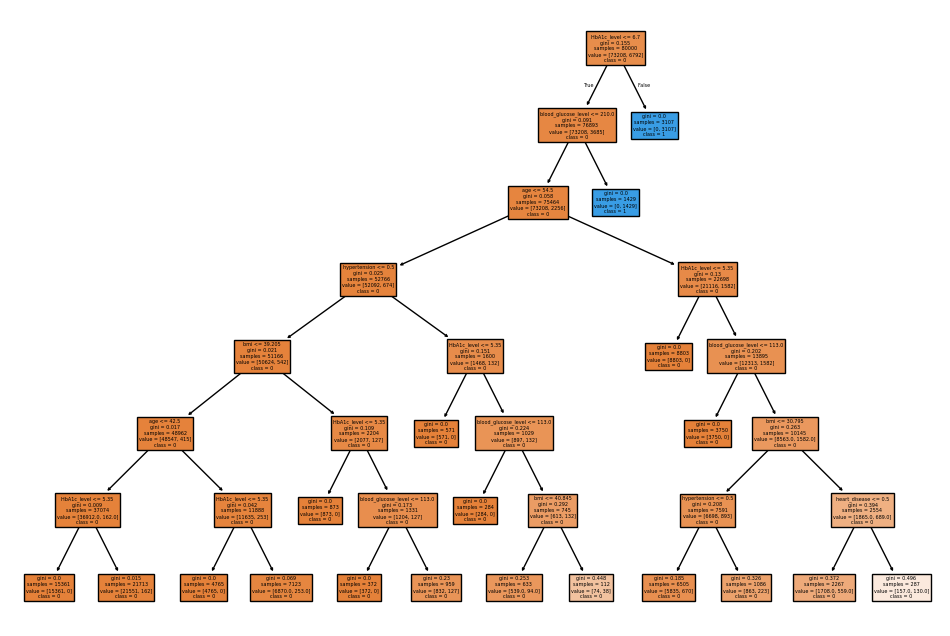

In [ ]:
plt.figure(figsize=(12, 8))  # Membuat figure baru dengan ukuran 12x8 inci
plot_tree(model, feature_names=X_train.columns, class_names=['0', '1'], filled=True)  # Menggambar pohon keputusan
plt.show()  # Menampilkan plot pohon keputusan